In [1]:
import os
import sys

sys.path.append("./")  # Adds higher directory to python modules path.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
from core.ODEDataset import ODEDataset
from utils import cleaning

import tensorflow as tf
from matplotlib import pyplot as plt

Let's load the dataset and  select the columns we want to use as features and labels.

## Dataset and Feature Selection

In [2]:
dataset = ODEDataset("Dataset")
dataset.from_csv("./playground/data/combined_dataset_cleaned.csv")


In [3]:
OUTPUT = "Presence_TV"

In [4]:
dataset.value_counts(OUTPUT)

Presence_TV
 0.0    8809
 1.0    1907
-1.0       2
Name: count, dtype: int64

### Categorized Features

In [5]:
categorized_features = ['Education_level_HHH',
                        'Socio_status_HHH',
                        'Tariff_payment_frequency',
                        'HH_with_home_business',
                        'Ownership_motorized_vehicle',
                        'Ownership_small_livestock',
                        'Ownership_large_livestock',
                        'Clean_fuel',
                        ]

for feature in categorized_features:
    dataset = dataset.apply(cleaning.add_one_hot_encoding(feature))

dataset.preview()

,Unnamed: 0,ID,Years_of_HHH_in_community,Dwelling_quality_index,Hours_available_electricity,Measurement_age,Monthly_expenditure,Number_of_rooms,Climate_zone_lev_1,Climate_zone_lev_2,...,Ownership_motorized_vehicle_missing,Ownership_small_livestock_No,Ownership_small_livestock_Yes,Ownership_small_livestock_missing,Ownership_large_livestock_No,Ownership_large_livestock_Yes,Ownership_large_livestock_missing,Clean_fuel_No,Clean_fuel_Yes,Clean_fuel_missing
0,0,1001_3,-1,0,-1,-1.0,63600.0,3,3.0,-1.0,...,False,False,True,False,True,False,False,True,False,False
1,1,1001_3,-1,0,-1,-1.0,63600.0,3,3.0,-1.0,...,False,False,True,False,True,False,False,True,False,False
2,2,1026_3,20,0,-1,-1.0,65400.0,3,3.0,3.0,...,False,False,True,False,False,True,False,True,False,False
3,3,1026_3,20,0,-1,-1.0,65400.0,3,3.0,3.0,...,False,False,True,False,False,True,False,True,False,False
4,4,1027_2,15,0,-1,-1.0,-1.0,2,3.0,3.0,...,False,False,True,False,False,True,False,True,False,False


### Features Selection

In [6]:
dataset.get_columns()

['Unnamed: 0',
 'ID',
 'Years_of_HHH_in_community',
 'Dwelling_quality_index',
 'Hours_available_electricity',
 'Measurement_age',
 'Monthly_expenditure',
 'Number_of_rooms',
 'Climate_zone_lev_1',
 'Climate_zone_lev_2',
 'Age_HHH',
 'Number_adults',
 'Presence_refrigerator/freezer',
 'Presence_iron',
 'Presence_fan',
 'Presence_DVD_player',
 'Presence_radio/stereo',
 'Presence_phone_charger',
 'Presence_TV',
 'Years_of_HHH_in_community_missing',
 'Dwelling_quality_index_missing',
 'Hours_available_electricity_missing',
 'Measurement_age_missing',
 'Monthly_expenditure_missing',
 'Number_of_rooms_missing',
 'Climate_zone_lev_1_missing',
 'Climate_zone_lev_2_missing',
 'Age_HHH_missing',
 'Number_adults_missing',
 "Education_level_HHH_Bachelor's or equivalent level",
 'Education_level_HHH_Doctoral or equivalent level',
 'Education_level_HHH_Lower secondary education',
 "Education_level_HHH_Master's or equivalent level",
 'Education_level_HHH_No schooling',
 'Education_level_HHH_Not else

In [7]:
Features = [
    #    'Education_level_HHH',
    'Education_level_HHH_Doctoral or equivalent level',
    'Education_level_HHH_Lower secondary education',
    "Education_level_HHH_Master's or equivalent level",
    'Education_level_HHH_No schooling',
    'Education_level_HHH_Not elsewhere classified',
    'Education_level_HHH_Other',
    'Education_level_HHH_Post-secondary non-tertiary education',
    'Education_level_HHH_Primary education',
    'Education_level_HHH_Secondary education',
    'Education_level_HHH_Short-cycle tertiary education',
    'Education_level_HHH_Upper secondary education',
    # 'Socio_status_HHH',
    'Socio_status_HHH_Employee', 'Socio_status_HHH_Employee farm',
    'Socio_status_HHH_Employee non-farm', 'Socio_status_HHH_Employer',
    'Socio_status_HHH_Other', 'Socio_status_HHH_Own-account worker farm',
    'Socio_status_HHH_Own-account worker non-farm',
    'Socio_status_HHH_Unemployed',
    'Socio_status_HHH_Worker not classifiable by status',
    # 'Tariff_payment_frequency',
    'Tariff_payment_frequency_Every 3 months',
    'Tariff_payment_frequency_Every 6 months',
    'Tariff_payment_frequency_Monthly', 'Tariff_payment_frequency_No bill',
    'Tariff_payment_frequency_Other', 'Tariff_payment_frequency_Weekly',

    'HH_with_home_business_Yes',
    'HH_with_home_business_No',
    'HH_with_home_business_missing',

    'Ownership_motorized_vehicle_Yes',
    'Ownership_large_livestock_No',
    'Ownership_motorized_vehicle_missing',

    'Ownership_small_livestock_Yes',
    'Ownership_small_livestock_No',
    'Ownership_small_livestock_missing',

    'Ownership_large_livestock_Yes',
    'Ownership_large_livestock_No',
    'Ownership_large_livestock_missing',

    'Clean_fuel_Yes',
    'Clean_fuel_No',
    'Clean_fuel_missing',

    'Years_of_HHH_in_community',
    'Years_of_HHH_in_community_missing',

    'Dwelling_quality_index',
    'Dwelling_quality_index_missing',

    'Hours_available_electricity',
    'Hours_available_electricity_missing',

    'Measurement_age',
    'Measurement_age_missing',

    'Monthly_expenditure',
    'Monthly_expenditure_missing',

    'Number_of_rooms',
    'Number_of_rooms_missing',
    'Climate_zone_lev_1',
    'Climate_zone_lev_1_missing',

    'Climate_zone_lev_2',
    'Climate_zone_lev_2_missing',

    'Age_HHH',
    'Age_HHH_missing',

    'Number_adults',
    'Number_adults_missing'
]

FEATURE_NUM = len(Features)

In [8]:
dataset = dataset.apply(cleaning.remove_row(OUTPUT, -1))
dataset.value_counts(OUTPUT)

Presence_TV
0.0    8809
1.0    1907
Name: count, dtype: int64

In [9]:
total = len(dataset)
positive = dataset.value_counts(OUTPUT)[1]
negative = total - positive

print(f"Positive: {positive/total}, Negative: {negative/total}")


Positive: 0.17795819335572974, Negative: 0.8220418066442703


In [10]:
X, y = dataset.to_numpy(Features, [OUTPUT])

In [11]:
X.shape, y.shape

((10716, 61), (10716, 1))

### Imbalanced Dataset Handling
We use SMOTE to oversample the minority class.
https://imbalanced-learn.org/stable/index.html

In [12]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE (oversampling)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
y_resampled = y_resampled.reshape(-1, 1)
print(X_resampled.shape, y_resampled.shape)

(17618, 61) (17618, 1)


In [13]:
dataset_resampled = tf.data.Dataset.from_tensor_slices((X_resampled, y_resampled))
for i, j in dataset_resampled:
    print(i.shape, j.shape)
    break

(61,) (1,)


In [14]:
tf_dataset = dataset.to_tf_dataset(Features, [OUTPUT])

## Constants and dataset splitting

In [15]:
BATCH_SIZE = 8
EPOCHS = 100
OPTIMIZER = tf.keras.optimizers.Adam(0.001)
LOSS = tf.keras.losses.BinaryCrossentropy()


In [16]:
from collections import Counter
def get_class_distribution(data):

    # Extract all labels from the dataset
    all_labels = []

    for _, label in data:  # Iterate over the dataset
        all_labels.append(label.numpy())  # Convert label tensors to NumPy arrays

    # Flatten the list in case labels are multi-dimensional
    all_labels = [i[0] for k in all_labels for i in list(k)]
    # Count occurrences of each label
    label_counts = Counter(all_labels)

    # Calculate the ratio for each label
    total_samples = sum(label_counts.values())
    label_ratios = {label: count / total_samples for label, count in label_counts.items()}

    # Print out the labels and their ratios
    print("Label Counts:", label_counts)
    print("Label Ratios:", label_ratios)



we want to shuffle until we get a good distribution of the classes

#### Original Dataset

In [17]:
ds = tf_dataset.shuffle(9001).batch(BATCH_SIZE)
ds_resampled = dataset_resampled.shuffle(9001).batch(BATCH_SIZE)

print("Training")
print("Distribution of the original dataset", len(ds))
get_class_distribution(ds)

print("Distribution of the resampled dataset", len(ds_resampled))
get_class_distribution(ds_resampled)



Training
Distribution of the original dataset 1340
Label Counts: Counter({0.0: 8809, 1.0: 1907})
Label Ratios: {0.0: 0.8220418066442703, 1.0: 0.17795819335572974}
Distribution of the resampled dataset 2203
Label Counts: Counter({0.0: 8809, 1.0: 8809})
Label Ratios: {0.0: 0.5, 1.0: 0.5}


### Splitting

In [18]:
LEN = len(ds_resampled)
train_len = int(0.8 * LEN)
val_size = int(0.1 * LEN)
test_size = int(0.1 * LEN)

train_ds = ds_resampled.take(train_len)
val_ds = ds_resampled.skip(train_len).take(val_size)
test_ds = ds_resampled.skip(train_len + val_size).take(test_size)

print("Training size", len(train_ds))
get_class_distribution(train_ds)
print("Validation size", len(val_ds))
get_class_distribution(val_ds)
print("Test size", len(test_ds))
get_class_distribution(test_ds)


Training size 1762
Label Counts: Counter({0.0: 7506, 1.0: 6590})
Label Ratios: {0.0: 0.5324914869466515, 1.0: 0.46750851305334845}
Validation size 220
Label Counts: Counter({1.0: 1099, 0.0: 661})
Label Ratios: {1.0: 0.6244318181818181, 0.0: 0.3755681818181818}
Test size 220
Label Counts: Counter({1.0: 1091, 0.0: 669})
Label Ratios: {0.0: 0.3801136363636364, 1.0: 0.6198863636363636}


## Model

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(FEATURE_NUM,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=['accuracy', 'precision', 'recall'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,089 (160.50 KB)

 Trainable params: 41,089 (160.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(train_ds, epochs=EPOCHS,

                    validation_data=val_ds)


Epoch 1/100
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6896 - loss: 137.6161 - precision: 0.4834 - recall: 0.5766 - val_accuracy: 0.4994 - val_loss: 0.5274 - val_precision: 0.8586 - val_recall: 0.2331
Epoch 2/100
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8210 - loss: 0.4068 - precision: 0.7405 - recall: 0.5094 - val_accuracy: 0.8153 - val_loss: 0.4079 - val_precision: 0.7764 - val_recall: 0.9746
Epoch 3/100
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8077 - loss: 0.3614 - precision: 0.6004 - recall: 0.8566 - val_accuracy: 0.8676 - val_loss: 0.3544 - val_precision: 0.8273 - val_recall: 0.9954
Epoch 4/100
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8204 - loss: 0.3725 - precision: 0.6395 - recall: 0.9236 - val_accuracy: 0.8517 - val_loss: 0.3678 - val_precision: 0.8171 - val_recall: 0.9798
Epoch 5/100
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7299 - loss: 0.7545 - precision: 0.5288 - recall: 0.6290 - val_accuracy: 0.87

## Visualization

Text(0.5, 0, 'Epoch')

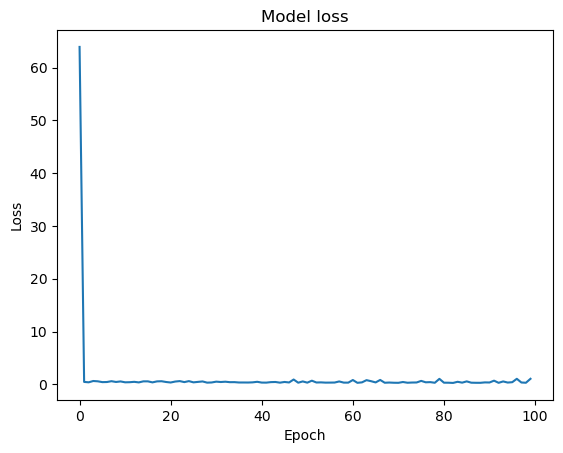

In [21]:

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

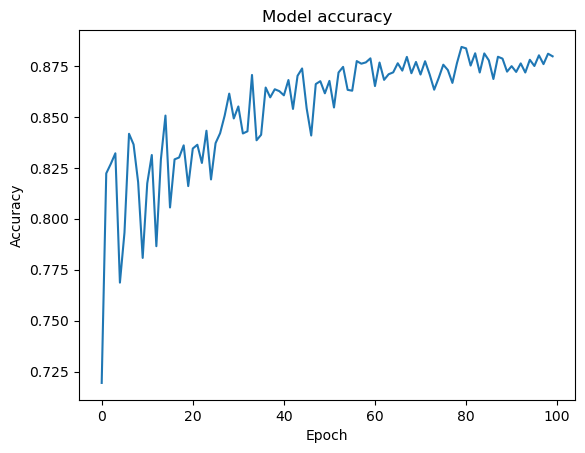

In [22]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [23]:
train_result =  model.evaluate(train_ds    )
val_result = model.evaluate(val_ds)
test_result = model.evaluate(test_ds)

1762/1762 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8834 - loss: 0.2568 - precision: 0.7224 - recall: 0.9702
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9088 - loss: 0.2451 - precision: 0.8850 - recall: 0.9821
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9112 - loss: 0.2373 - precision: 0.8880 - recall: 0.9769


In [24]:
print("Train")
print("Accuracy", train_result[1])
print("Precision", train_result[2])
print("Recall", train_result[3])
print("#" * 10)
print("Validation")
print("Accuracy", val_result[1])
print("Precision", val_result[2])
print("Recall", val_result[3])
print("#" * 10)
print("Test")
print("Accuracy", test_result[1])
print("Precision", test_result[2])
print("Recall", test_result[3])


Train
Accuracy 0.8972758054733276
Precision 0.8339549899101257
Recall 0.9763590097427368
##########
Validation
Accuracy 0.9068182110786438
Precision 0.8836065530776978
Recall 0.9800000190734863
##########
Test
Accuracy 0.9136363863945007
Precision 0.8941666483879089
Recall 0.9772313237190247
